In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/PPEDedect/Dataset


Test  Train  Validation


In [ ]:
# --- Create data config file for YOLOv8 ---
dataset_path = "/content/drive/MyDrive/PPEDedect/Dataset"  # << change this

yaml_text = f"""
train: {dataset_path}/Train
val: {dataset_path}/Validation

nc: 7
names: ['hardhat', 'mask', 'vest', 'no_hardhat', 'no_mask', 'no_vest', 'person']
"""

with open("ppe.yaml", "w") as f:
    f.write(yaml_text)

!cat ppe.yaml


train: /content/drive/MyDrive/PPEDedect/Dataset/Train
val: /content/drive/MyDrive/PPEDedect/Dataset/Validation

nc: 7
names: ['hardhat', 'mask', 'vest', 'no_hardhat', 'no_mask', 'no_vest', 'person']


In [ ]:
# Reinstall Colab default packages
!pip install -q google-colab==1.0.0
!pip install -q pandas==2.2.2
!pip install -q matplotlib==3.7.1
!pip install -q fastai==2.8.4 spacy<4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.8.4 requires spacy<4, which is not installed.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.8.4 requires spacy<4, which is not installed.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
arviz 0.22.0 requires matplotlib>=3.8, but you have matplotlib 3.7.1 which is incompatible.
/bin/bash: line 1: 4: No such file or directory


In [ ]:
# YOLOv8 setup
!pip install -q ultralytics==8.2.50
!pip install -q opencv-python-headless==4.10.0.84


In [ ]:
from ultralytics import YOLO
import cv2

print("✅ YOLO imported!")
print("✅ OpenCV version:", cv2.__version__)


✅ YOLO imported!
✅ OpenCV version: 4.11.0


In [ ]:
!pip install --upgrade ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 13.9 MB/s  0:00:30
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 49.1 MB/s  0:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 128.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 61.3 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 50.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 12.6 MB/s  0:00:23
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 38.2 MB/s  0:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 59.9 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 69.4 MB/s  0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 68.3 MB/s  0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 30.8 MB/s  0:00:08

In [ ]:
!wget https://github.com/ultralytics/ultralytics/releases/download/v8.0.0/yolov8s.pt -O yolov8s.pt


--2025-10-25 05:20:42--  https://github.com/ultralytics/ultralytics/releases/download/v8.0.0/yolov8s.pt
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-10-25 05:20:43 ERROR 404: Not Found.



In [ ]:
# --- Train YOLOv8 on Drive dataset ---
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # or yolov8s.pt for better accuracy if needed

results = model.train(
    data="ppe.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="ppe_drive_train",
    project="/content/drive/MyDrive/PPEDedect"  # saves output to Drive
)

Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu128 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=ppe.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_drive_train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

In [ ]:
# --- Run Inference ---
import os
test_image = os.path.join(dataset_path, "/content/drive/MyDrive/PPEDedect/Dataset/Test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg")  # update filename

results = model.predict(source=test_image, conf=0.3, save=True)



image 1/1 /content/drive/MyDrive/PPEDedect/Dataset/Test/images/-4405-_png_jpg.rf.82b5c10b2acd1cfaa24259ada8e599fe.jpg: 640x640 (no detections), 268.3ms
Speed: 4.3ms preprocess, 268.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


In [ ]:
# --- Run Inference ---
import os
test_image = os.path.join(dataset_path, "/content/drive/MyDrive/PPEDedect/Dataset/Test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg")  # update filename

results = model.predict(source=test_image, conf=0.3, save=True)



image 1/1 /content/drive/MyDrive/PPEDedect/Dataset/Test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg: 640x640 1 vest, 2 no_vests, 245.5ms
Speed: 10.5ms preprocess, 245.5ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


In [ ]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu128 CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 14.5±11.6 MB/s, size: 56.1 KB)
val: Scanning /content/drive/MyDrive/PPEDedect/Dataset/Validation/labels.cache... 94 images, 25 backgrounds, 40 corrupt: 100% ━━━━━━━━━━━━ 114/114 25.6Kit/s 0.0s
val: /content/drive/MyDrive/PPEDedect/Dataset/Validation/images/-211-_png_jpg.rf.eac228e3993f9027795b6400262811e7.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 7. Possible class labels are 0-6
val: /content/drive/MyDrive/PPEDedect/Dataset/Validation/images/4_jpg.rf.a937c41e1fc4d92e9e1f8c2d9efeb87d.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 7. Possible class labels are 0-6
val: /content/drive/MyDrive/PPEDedect/Dataset/Validation/images/autox3_mp4-78_jpg.rf.dc5c00104c4cf733c2c06c820b82d338.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 7. Possible class labels are 0-6
val

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

train: /content/drive/MyDrive/PPEDedect/Dataset/Train
val: /content/drive/MyDrive/PPEDedect/Dataset/Validation

nc: 7
names: ['hardhat', 'mask', 'vest', 'no_hardhat', 'no_mask', 'no_vest', 'person']
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu128 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=ppe.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=F

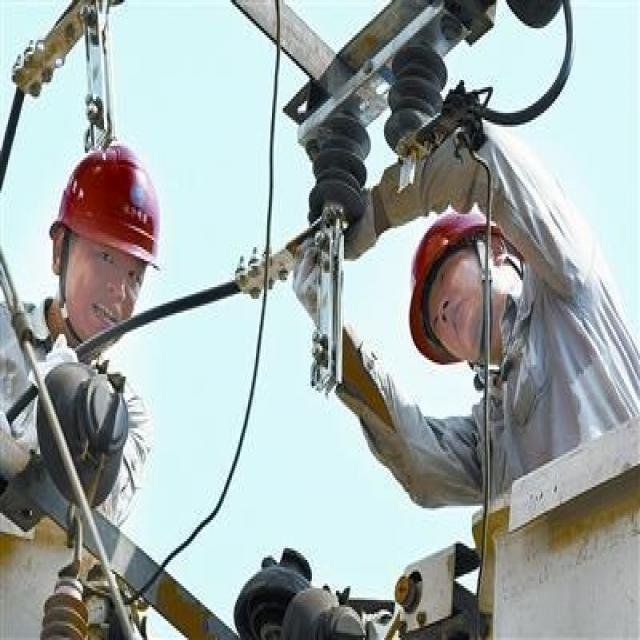

In [ ]:
# ============================================
# PPE Detection Project (Google Drive Dataset)
# ============================================

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
dataset_path = "/content/drive/MyDrive/PPEDedect/Dataset"

# Step 2: Install dependencies
!pip install -q ultralytics==8.2.50 opencv-python-headless matplotlib pandas seaborn

from ultralytics import YOLO
import os
import cv2
import numpy as np
from IPython.display import Image, display

# Step 3: Create YOLOv8 YAML config file
yaml_text = f"""
train: {dataset_path}/Train
val: {dataset_path}/Validation

nc: 7
names: ['hardhat', 'mask', 'vest', 'no_hardhat', 'no_mask', 'no_vest', 'person']
"""
with open("ppe.yaml", "w") as f:
    f.write(yaml_text)
!cat ppe.yaml

# Step 4: Initialize YOLOv8 model
model = YOLO('yolov8n.pt')  # You can switch to yolov8n.pt for faster/smaller model

# Step 5: Train the model
results = model.train(
    data="ppe.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="ppe_drive_train",
    project="/content/drive/MyDrive/PPE_Results"  # Save results directly to Drive
)

# Step 6: Run inference on a test image
test_image = os.path.join(dataset_path, "Test/images/000005_jpg.rf.96e9379ccae638140c4a90fc4b700a2b.jpg")  # Replace with actual test image
results = model.predict(source=test_image, conf=0.3, save=True)

# Display annotated image
Image(filename=results[0].save_dir + "/" + os.path.basename(test_image))

# Step 7: Evaluate the model
metrics = model.val()
print("Evaluation Metrics:")
print(metrics)

# Step 8: Compliance logic (Green/Yellow/Red)
img = cv2.imread(test_image)
results = model(test_image, conf=0.3)[0]

person_boxes = []
ppe_boxes = {'hardhat': [], 'mask': [], 'vest': []}

for box, cls in zip(results.boxes.xyxy, results.boxes.cls):
    cls_name = model.names[int(cls)]
    if cls_name == "person":
        person_boxes.append(box)
    elif cls_name in ppe_boxes:
        ppe_boxes[cls_name].append(box)

def is_inside(p_box, c_box):
    return (c_box[0]>p_box[0]) and (c_box[2]<p_box[2]) and (c_box[1]>p_box[1]) and (c_box[3]<p_box[3])

for i, p in enumerate(person_boxes):
    count = sum(any(is_inside(p, c) for c in ppe_boxes[item]) for item in ppe_boxes)
    if count == 3:
        color, text = (0,255,0), "Green" # Green (all PPE)
    elif count >=1:
        color, text = (0,255,255), "Yellow" # Yellow (some PPE)
    else:
        color, text = (0,0,255), "Red" # Red (no PPE)

    # Draw rectangle and text on the image
    p_box = p.cpu().numpy().astype(int)
    cv2.rectangle(img, (p_box[0], p_box[1]), (p_box[2], p_box[3]), color, 2)
    cv2.putText(img, text, (p_box[0], p_box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Display the resulting image with compliance labels
display(Image(data=cv2.imencode('.jpg', img)[1].tobytes()))

In [ ]:
# ===================================================
# PPE Detection System — Colab + Streamlit + ngrok
# ===================================================

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset path
dataset_path = "/content/drive/MyDrive/PPEDedect/Dataset"

# Step 2: Install dependencies
!pip install -q ultralytics==8.2.50 opencv-python-headless matplotlib pandas seaborn streamlit pyngrok

from ultralytics import YOLO
import os
import cv2
import numpy as np
from IPython.display import Image, display

# Step 3: Ensure Train and Validation folders exist (Optional - if you already have the dataset)
# os.makedirs(os.path.join(dataset_path, "Train"), exist_ok=True)
# os.makedirs(os.path.join(dataset_path, "Validation"), exist_ok=True)
# os.makedirs(os.path.join(dataset_path, "labels/Train"), exist_ok=True)
# os.makedirs(os.path.join(dataset_path, "labels/Validation"), exist_ok=True)


# Step 4: Create YAML config for YOLOv8
yaml_text = f"""
train: {dataset_path}/Train
val: {dataset_path}/Validation

nc: 7
names: ['hardhat', 'mask', 'vest', 'no_hardhat', 'no_mask', 'no_vest', 'person']
"""
with open("ppe.yaml", "w") as f:
    f.write(yaml_text)

!cat ppe.yaml

# Step 5: Initialize YOLOv8 model
model = YOLO('yolov8n.pt')  # lightweight model

# Step 6: Train YOLOv8
results = model.train(
    data="ppe.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="ppe_drive_train_streamlit",
    project="/content/drive/MyDrive/PPE_Results"
)

# Step 7: Evaluate model
metrics = model.val()
print("Evaluation Metrics:")
print(metrics)

# Step 8: Compliance function for Streamlit
def annotate_compliance(image_path, model):
    img = cv2.imread(image_path)
    results = model(image_path, conf=0.3)[0]

    person_boxes = []
    ppe_boxes = {'hardhat': [], 'mask': [], 'vest': []}

    for box, cls in zip(results.boxes.xyxy, results.boxes.cls):
        cls_name = model.names[int(cls)]
        if cls_name == "person":
            person_boxes.append(box)
        elif cls_name in ppe_boxes:
            ppe_boxes[cls_name].append(box)

    def is_inside(p_box, c_box):
        return (c_box[0] > p_box[0]) and (c_box[2] < p_box[2]) and (c_box[1] > p_box[1]) and (c_box[3] < p_box[3])

    for p in person_boxes:
        count = sum(any(is_inside(p, c) for c in ppe_boxes[item]) for item in ppe_boxes)
        if count == 3:
            color, text = (0, 255, 0), "Compliant"
        elif count >= 1:
            color, text = (0, 255, 255), "Partial"
        else:
            color, text = (0, 0, 255), "Non-Compliant"
        x1, y1, x2, y2 = map(int, p)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
        cv2.putText(img, text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    output_path = "compliance_result.jpg"
    cv2.imwrite(output_path, img)
    return output_path

# Step 9: Create Streamlit app
app_code = """
import streamlit as st
from PIL import Image
import cv2
import numpy as np
from ultralytics import YOLO

st.title("🦺 PPE Compliance Detection Dashboard")

model = YOLO('/content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt')

uploaded_file = st.file_uploader("Upload a worker image", type=["jpg","png","jpeg"])

def annotate_compliance(image_path, model):
    img = cv2.imread(image_path)
    results = model(image_path, conf=0.3)[0]

    person_boxes = []
    ppe_boxes = {'hardhat': [], 'mask': [], 'vest': []}

    for box, cls in zip(results.boxes.xyxy, results.boxes.cls):
        cls_name = model.names[int(cls)]
        if cls_name == "person":
            person_boxes.append(box)
        elif cls_name in ppe_boxes:
            ppe_boxes[cls_name].append(box)

    def is_inside(p_box, c_box):
        return (c_box[0] > p_box[0]) and (c_box[2] < p_box[2]) and (c_box[1] > p_box[1]) and (c_box[3] < p_box[3])

    for p in person_boxes:
        count = sum(any(is_inside(p, c) for c in ppe_boxes[item]) for item in ppe_boxes)
        if count == 3:
            color, text = (0, 255, 0), "Compliant"
        elif count >= 1:
            color, text = (0, 255, 255), "Partial"
        else:
            color, text = (0, 0, 255), "Non-Compliant"
        x1, y1, x2, y2 = map(int, p)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
        cv2.putText(img, text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    output_path = "compliance_result.jpg"
    cv2.imwrite(output_path, img)
    return output_path

if uploaded_file is not None:
    with open("temp.jpg", "wb") as f:
        f.write(uploaded_file.getbuffer())
    output_img = annotate_compliance("temp.jpg", model)
    st.image(output_img, caption="Detection & Compliance", use_column_width=True)
"""

with open("app.py", "w") as f:
    f.write(app_code)

# Step 10: Run Streamlit + ngrok
from pyngrok import ngrok
import subprocess

# Run streamlit in background
get_ipython().system_raw("streamlit run app.py &")

# Open public URL
public_url = ngrok.connect(8501)
print("Streamlit Dashboard URL:", public_url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

train: /content/drive/MyDrive/PPEDedect/Dataset/Train
val: /content/drive/MyDrive/PPEDedect/Dataset/Validation

nc: 7
names: ['hardhat', 'mask', 'vest', 'no_hardhat', 'no_mask', 'no_vest', 'person']
Ultralytics 8.3.221 🚀 Python-3.12.12 torch-2.8.0+cu128 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=ppe.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=F

KeyboardInterrupt: 

In [ ]:
# Step 9: Create Streamlit app
app_code = """
import streamlit as st
from PIL import Image
import cv2
import numpy as np
from ultralytics import YOLO
import os
import torch
import ultralytics # Import ultralytics here for add_safe_globals

# Add required globals for safe unpickling
try:
    torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel, torch.nn.modules.container.Sequential])
except AttributeError:
    # For older torch versions that don't have add_safe_globals
    pass


st.title("🦺 PPE Compliance Detection Dashboard")

# Load the model
model_path = '/content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt'
try:
    model = YOLO(model_path, task='detect')
except Exception as e:
    st.error(f"Error loading model from {model_path}: {e}")
    st.stop()


uploaded_file = st.file_uploader("Upload a worker image", type=["jpg","png","jpeg"])

def annotate_compliance(image_path, model):
    img = cv2.imread(image_path)
    results = model(image_path, conf=0.3)[0]

    person_boxes = []
    ppe_boxes = {'hardhat': [], 'mask': [], 'vest': []}

    for box, cls in zip(results.boxes.xyxy, results.boxes.cls):
        cls_name = model.names[int(cls)]
        if cls_name == "person":
            person_boxes.append(box)
        elif cls_name in ppe_boxes:
            ppe_boxes[cls_name].append(box)

    def is_inside(p_box, c_box):
        return (c_box[0] > p_box[0]) and (c_box[2] < p_box[2]) and (c_box[1] > p_box[1]) and (c_box[3] < p_box[3])

    for p in person_boxes:
        count = sum(any(is_inside(p, c) for c in ppe_boxes[item]) for item in ppe_boxes)
        if count == 3:
            color, text = (0, 255, 0), "Compliant"
        elif count >= 1:
            color, text = (0, 255, 255), "Partial"
        else:
            color, text = (0, 0, 255), "Non-Compliant"
        x1, y1, x2, y2 = map(int, p)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
        cv2.putText(img, text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)
    output_path = "compliance_result.jpg"
    cv2.imwrite(output_path, img)
    return output_path

if uploaded_file is not None:
    with open("temp.jpg", "wb") as f:
        f.write(uploaded_file.getbuffer())
    output_img = annotate_compliance("temp.jpg", model)
    st.image(output_img, caption="Detection & Compliance", use_column_width=True)
"""

with open("app.py", "w") as f:
    f.write(app_code)

# Step 10: Run Streamlit + ngrok
from pyngrok import ngrok
import subprocess
from google.colab import userdata
import torch # Import torch here as well
import ultralytics # Import ultralytics here as well

# Get the authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
print(f"Ngrok Authtoken Loaded: {'Yes' if NGROK_AUTH_TOKEN else 'No'}")


# Check if model path exists
model_path_check = '/content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt'
print(f"Model file exists at {model_path_check}: {os.path.exists(model_path_check)}")


ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# This add_safe_globals is for the Colab environment if needed elsewhere,
# but the primary fix is now inside app_code.
try:
    torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel])
except AttributeError:
    pass


# Run streamlit in background
get_ipython().system_raw("streamlit run app.py &")

# Open public URL
public_url = ngrok.connect(8501)
print("Streamlit Dashboard URL:", public_url)

Ngrok Authtoken Loaded: Yes
Model file exists at /content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt: True


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 5 endpoints over a single ngrok agent session.\nThe endpoints already running on this session are:\ntn_34YJAUHKvvgs5MB1r8KvcEKzkZa, tn_34YGlXoUEG41jYEYZXACbNNw0IG, tn_34YHLeM3bt9WOcCPk8zgKF6q87O, tn_34YHVnYGKsY0Egh2ajaAIpOAXym, tn_34YIk8ofZzfKUhWzGDqjIuVZjq9.\nUpgrade to a Pay-as-you-go plan at: https://dashboard.ngrok.com/billing/choose-a-plan?plan=paygo\r\n\r\nERR_NGROK_324\r\n"}}


In [ ]:
!pip install ultralytics==8.3.21 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 17.0 MB/s eta 0:00:00


In [ ]:
!pip install streamlit==1.39.0 pyngrok==7.2.0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.16.0 requires watchdog<7.0.0,>=6.0.0, but you have watchdog 5.0.3 which is incompatible.


In [ ]:
# Step 9: Create Streamlit app #Dont Use It
app_code = """
import streamlit as st
from PIL import Image
import cv2
import numpy as np
from ultralytics import YOLO
import os
import torch
import ultralytics # Import ultralytics here for add_safe_globals
from collections import Counter

# Add required globals for safe unpickling
try:
    torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel, torch.nn.modules.container.Sequential])
except AttributeError:
    # For older torch versions that don't have add_safe_globals
    pass


st.title("🦺 PPE Compliance Detection Dashboard")

# Load the model
model_path = '/content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt'
try:
    model = YOLO(model_path, task='detect')
except Exception as e:
    st.error(f"Error loading model from {model_path}: {e}")
    st.stop()


uploaded_file = st.file_uploader("Upload a worker image", type=["jpg","png","jpeg"])

def annotate_compliance(image_path, model):
    img = cv2.imread(image_path)
    results = model(image_path, conf=0.3)[0]

    person_boxes = []
    ppe_boxes = {'hardhat': [], 'mask': [], 'vest': []}
    detected_classes = []

    for box, cls in zip(results.boxes.xyxy, results.boxes.cls):
        cls_name = model.names[int(cls)]
        detected_classes.append(cls_name)
        if cls_name == "person":
            person_boxes.append(box)
        elif cls_name in ppe_boxes:
            ppe_boxes[cls_name].append(box)

    def is_inside(p_box, c_box):
        return (c_box[0] > p_box[0]) and (c_box[2] < p_box[2]) and (c_box[1] > p_box[1]) and (c_box[3] < p_box[3])

    compliance_details = {}

    for i, p in enumerate(person_boxes):
        person_id = f"Person {i+1}"
        present_ppe = []
        missing_ppe = []
        required_ppe = ['hardhat', 'mask', 'vest']

        for item in required_ppe:
            if any(is_inside(p, c) for c in ppe_boxes[item]):
                present_ppe.append(item)
            else:
                missing_ppe.append(item)

        count = len(present_ppe)
        if count == 3:
            color, text = (0, 255, 0), "Compliant"
        elif count >= 1:
            color, text = (0, 255, 255), "Partial"
        else:
            color, text = (0, 0, 255), "Non-Compliant"

        x1, y1, x2, y2 = map(int, p)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
        cv2.putText(img, text, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2)

        compliance_details[person_id] = {
            "status": text,
            "present_ppe": present_ppe,
            "missing_ppe": missing_ppe
        }

    output_path = "compliance_result.jpg"
    cv2.imwrite(output_path, img)
    return output_path, detected_classes, compliance_details

if uploaded_file is not None:
    with open("temp.jpg", "wb") as f:
        f.write(uploaded_file.getbuffer())
    output_img_path, detected_classes, compliance_details = annotate_compliance("temp.jpg", model)
    st.image(output_img_path, caption="Detection & Compliance", use_column_width=True)

    st.subheader("Detected Items Summary:")
    class_counts = Counter(detected_classes)
    for cls_name, count in class_counts.items():
        st.write(f"- {cls_name}: {count}")

    st.subheader("Compliance Details per Person:")
    if compliance_details:
        for person_id, details in compliance_details.items():
            st.write(f"**{person_id}:**")
            st.write(f"Status: {details['status']}")
            if details['present_ppe']:
                st.write(f"Wearing: {', '.join(details['present_ppe'])}")
            if details['missing_ppe']:
                st.write(f"Missing: {', '.join(details['missing_ppe'])}")
            st.write("---")
    else:
        st.write("No persons detected in the image.")


"""

with open("app.py", "w") as f:
    f.write(app_code)

# Step 10: Run Streamlit + ngrok
from pyngrok import ngrok
import subprocess
from google.colab import userdata
import torch # Import torch here as well
import ultralytics # Import ultralytics here as well


# Get the authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
print(f"Ngrok Authtoken Loaded: {'Yes' if NGROK_AUTH_TOKEN else 'No'}")


# Check if model path exists
model_path_check = '/content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt'
print(f"Model file exists at {model_path_check}: {os.path.exists(model_path_check)}")


ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# This add_safe_globals is for the Colab environment if needed elsewhere,
# but the primary fix is now inside app_code.
try:
    torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel])
except AttributeError:
    # For older torch versions that don't have add_safe_globals
    pass


# Run streamlit in background
get_ipython().system_raw("streamlit run app.py &")

# Open public URL
public_url = ngrok.connect(8501)
print("Streamlit Dashboard URL:", public_url)

Ngrok Authtoken Loaded: Yes
Model file exists at /content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt: True
Streamlit Dashboard URL: NgrokTunnel: "https://crawlier-scrawny-tenesha.ngrok-free.dev" -> "http://localhost:8501"


You can list your active ngrok tunnels and disconnect them programmatically using `pyngrok`.

In [ ]:
# ---------- Hardened Colab cell to write and run Streamlit PPE app ----------
# Run this after mounting Google Drive

# 0) Install required packages (run once per session)
!pip install -q ultralytics==8.3.14 streamlit pyngrok==7.2.0

# 1) Imports
import os, time, subprocess
import torch
import ultralytics
from ultralytics import YOLO
from pyngrok import ngrok
from google.colab import userdata # Import userdata to access secrets

# 2) Allow ultralytics DetectionModel for safe unpickle (PyTorch >= 2.6)
try:
    torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel])
except Exception:
    pass

# 3) Helper: find latest best.pt in your Drive results folder
def find_latest_best_pt(root_dir="/content/drive/MyDrive/PPE_Results"):
    # returns the first best.pt found (search depth)
    if not os.path.exists(root_dir):
        return None
    matches = []
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "best.pt" in filenames:
            matches.append(os.path.join(dirpath, "best.pt"))
    if not matches:
        return None
    # sort by modified time (newest first)
    matches.sort(key=lambda p: os.path.getmtime(p), reverse=True)
    return matches[0]

# 4) Determine model path (auto-detect if not exact)
requested_path = '/content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt'
detected = find_latest_best_pt("/content/drive/MyDrive/PPE_Results")
if os.path.exists(requested_path):
    model_path = requested_path
elif detected:
    model_path = detected
else:
    model_path = None

print("Requested model path:", requested_path)
print("Auto-detected model path:", detected)
print("Using model path:", model_path)

# 5) Create Streamlit app contents (improved)
app_code = f"""
import streamlit as st
from PIL import Image
import cv2
import numpy as np
from ultralytics import YOLO
import torch, ultralytics
import os
from collections import Counter

# Safe load allowlist
try:
    torch.serialization.add_safe_globals([ultralytics.nn.tasks.DetectionModel])
except Exception:
    pass

st.title("🦺 PPE Compliance Detection Dashboard")

# Load model - fallback to yolov8n if file not available
MODEL_PATH = {repr(model_path)}
if MODEL_PATH and os.path.exists(MODEL_PATH):
    try:
        model = YOLO(MODEL_PATH)
        st.info(f"Loaded model: {{MODEL_PATH}}")
    except Exception as e:
        st.error(f"Failed to load model at {{MODEL_PATH}}: {{e}}. Falling back to yolov8n pretrained.")
        model = YOLO('yolov8n.pt')
else:
    st.warning("No trained model found in Drive. Using pretrained yolov8n detector (no PPE fine-tuning).")
    model = YOLO('yolov8n.pt')

uploaded_file = st.file_uploader("Upload a worker image", type=["jpg","png","jpeg"])

def annotate_compliance_from_imageframe(img_frame, model):
    # img_frame: numpy image (BGR or RGB)
    # ultralytics Yolo accepts numpy arrays or PIL, we'll provide numpy RGB
    # ensure RGB
    if img_frame.shape[2] == 3:
        input_img = img_frame[:,:,::-1]  # BGR->RGB if needed (cv2.imread gives BGR)
    else:
        input_img = img_frame
    results = model(input_img, conf=0.3)[0]
    # draw boxes using results.plot (returns RGB)
    try:
        plotted = results.plot()  # RGB numpy
    except Exception:
        plotted = input_img
    # collect detected class names
    detected = [results.names[int(c)] for c in results.boxes.cls] if len(results.boxes) else []
    # Try person grouping compliance only if 'person' present
    compliance_details = {{}}
    if 'person' in results.names.values():
        # build boxes arrays
        person_boxes = []
        ppe_boxes = {{'hardhat': [], 'mask': [], 'vest': []}}
        for bbox, cls in zip(results.boxes.xyxy, results.boxes.cls):
            cls_name = results.names[int(cls)]
            if cls_name == 'person':
                person_boxes.append(bbox)
            elif cls_name in ppe_boxes:
                ppe_boxes[cls_name].append(bbox)
        # helper
        def is_inside(p_box, c_box):
            return (c_box[0] > p_box[0]) and (c_box[2] < p_box[2]) and (c_box[1] > p_box[1]) and (c_box[3] < p_box[3])
        compliance_details = {{}}
        for i, p in enumerate(person_boxes):
            pid = f"Person {{i+1}}"
            present = []
            missing = []
            for item in ['hardhat','mask','vest']:
                if any(is_inside(p, c) for c in ppe_boxes[item]):
                    present.append(item)
                else:
                    missing.append(item)
            count = len(present)
            if count == 3:
                status = 'Compliant'
            elif count >= 1:
                status = 'Partial'
            else:
                status = 'Non-Compliant'
            compliance_details[pid] = {{'status': status, 'present': present, 'missing': missing}}
    else:
        compliance_details = {{}}
    return plotted, detected, compliance_details

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('RGB')
    img_np = np.array(image)  # RGB
    # Run detection + compliance
    with st.spinner("Running detection..."):
        plotted, detected, compliance = annotate_compliance_from_imageframe(img_np, model)
    st.image(plotted, caption="Detection & Compliance (RGB)", use_column_width=True)

    st.subheader("Detected Items Summary:")
    if detected:
        counts = Counter(detected)
        for k,v in counts.items():
            st.write(f"- {{k}}: {{v}}")
    else:
        st.write("No items detected.")

    st.subheader("Compliance Details per Person:")
    if compliance:
        for pid, info in compliance.items():
            st.write(f"**{{pid}}** - Status: {{info['status']}}")
            if info['present']:
                st.write("Wearing: " + ", ".join(info['present']))
            if info['missing']:
                st.write("Missing: " + ", ".join(info['missing']))
            st.write("---")
    else:
        st.write("No persons detected or no person class in the model.")
"""

# 6) Save app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("Wrote app.py")

# 7) Prepare ngrok auth (optional)
# Get the authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
if NGROK_AUTH_TOKEN:
    try:
        ngrok.set_auth_token(NGROK_AUTH_TOKEN)
        print("ngrok authtoken set from Colab secrets.")
    except Exception as e:
        print("Could not set ngrok token:", e)
else:
    print("No ngrok auth token found in Colab secrets. Proceeding without explicit token (free tunnels allowed, but may be limited).")


# 8) Kill any process on port 8501, then start streamlit in background
print("Killing any existing service on port 8501 (if present)...")
!kill -9 $(lsof -t -i:8501) 2>/dev/null || true

print("Launching Streamlit...")
# Use nohup-like background process
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

# 9) Wait for the server to boot then connect ngrok
print("Waiting for Streamlit to boot (this can take 6-20s)...")
time.sleep(15)  # increase if needed

try:
    public_url = ngrok.connect(8501)
    print("Streamlit Dashboard URL:", public_url)
except Exception as e:
    print("Failed to create ngrok tunnel:", e)
    print("If you see errors, increase the sleep() time above and re-run the connect command.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.4/870.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Requested model path: /content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt
Auto-detected model path: /content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt
Using model path: /content/drive/MyDrive/PPE_Results/ppe_drive_train_streamlit/weights/best.pt
Wrote app.py
ngrok authtoken set from Colab secrets.
Killing any existing service on port 8501 (if present)...
Launching Streamlit...
Waiting for Streamlit